In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='darkgrid')
from math import sqrt

In [2]:
sns.set(color_codes=True)

In [3]:
cars= pd.read_csv('F://cars.csv')

In [4]:
cars.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [5]:
cars.var()

speed     27.959184
dist     664.060816
dtype: float64

In [6]:
x_bar=cars.speed.mean()
x_bar

15.4

In [7]:
y_bar=cars.dist.mean()
y_bar

42.98

In [8]:
cars['X-X_bar']=cars.speed-x_bar

In [9]:
cars['Y-Y_bar']=cars.dist-y_bar

In [10]:
#cars.head(3)

In [11]:
cars['(X-X_bar)(Y-Y_bar)']= cars['X-X_bar']*cars['Y-Y_bar']

In [12]:
#cars.head()

In [13]:
cars['(Y-Y_bar)^2']= cars['Y-Y_bar']**2

In [14]:
#cars.head()

In [15]:
cars['Slope Numerator']= cars['(X-X_bar)(Y-Y_bar)'].sum()

In [16]:
#cars.head()

In [17]:
cars['(X-X_bar)^2']= cars['X-X_bar']**2

In [18]:
#cars.head()

In [19]:
cars['Slope Denominator']= cars['(X-X_bar)^2'].sum()

In [20]:
#cars.head()

In [21]:
cars['Slope']= cars['(X-X_bar)(Y-Y_bar)'].sum()/cars['(X-X_bar)^2'].sum()

In [22]:
#cars.head()

In [23]:
cars['Intercept']= y_bar-cars['Slope']*x_bar

In [24]:
#cars.head()

In [25]:
cars['Y-Predict']= cars['Slope']*cars['speed']+cars['Intercept']

In [26]:
#cars.head()

In [27]:
cars.head(10)

,speed,dist,X-X_bar,Y-Y_bar,(X-X_bar)(Y-Y_bar),(Y-Y_bar)^2,Slope Numerator,(X-X_bar)^2,Slope Denominator,Slope,Intercept,Y-Predict
0,4,2,-11.4,-40.98,467.172,1679.3604,5387.4,129.96,1370.0,3.932409,-17.579095,-1.849460
1,4,10,-11.4,-32.98,375.972,1087.6804,5387.4,129.96,1370.0,3.932409,-17.579095,-1.849460
2,7,4,-8.4,-38.98,327.432,1519.4404,5387.4,70.56,1370.0,3.932409,-17.579095,9.947766
3,7,22,-8.4,-20.98,176.232,440.1604,5387.4,70.56,1370.0,3.932409,-17.579095,9.947766
4,8,16,-7.4,-26.98,199.652,727.9204,5387.4,54.76,1370.0,3.932409,-17.579095,13.880175
5,9,10,-6.4,-32.98,211.072,1087.6804,5387.4,40.96,1370.0,3.932409,-17.579095,17.812584
6,10,18,-5.4,-24.98,134.892,624.0004,5387.4,29.16,1370.0,3.932409,-17.579095,21.744993
7,10,26,-5.4,-16.98,91.692,288.3204,5387.4,29.16,1370.0,3.932409,-17.579095,21.744993
8,10,34,-5.4,-8.98,48.492,80.6404,5387.4,29.16,1370.0,3.932409,-17.579095,21.744993
9,11,17,-4.4,-25.98,114.312,674.9604,5387.4,19.36,1370.0,3.932409,-17.579095,25.677401


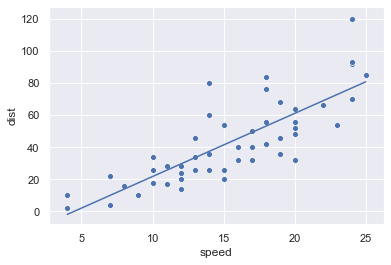

In [28]:
plt.plot(cars['speed'],cars['Y-Predict'])
sns.scatterplot(cars['speed'],cars['dist'])

In [29]:
cars.to_excel('cars1.xlsx',index=False)

## Simple Linear Regression:

In [30]:
pred= cars['Y-Predict'].values
#R- Squared
# R- squared (R2) is a statistical that represents the proportion of the variance for a dependent variable thats explained by an depedndent variable
Y= cars['dist'].values
m= len(cars)
sst=0
ssr=0
for i in range(m):
    sst += (Y[i]-y_bar)**2
    ssr += (pred[i]-y_bar)**2
r2= (ssr/sst)
print(r2)
# we need to plot for errors also
# we will import some models

0.651079380758251


## Model- 1

In [40]:
X= cars['speed'].values
from sklearn.linear_model import LinearRegression   #sklearn is for machine learning
from sklearn.metrics import mean_squared_error

X= X.reshape((m,1))

reg= LinearRegression()
model= reg.fit(X,Y)

In [41]:
Y_pred= model.predict(X)

In [42]:
mse= mean_squared_error(Y,Y_pred)
rmse= np.sqrt(mse)
r_squared =  model.score(X,Y)
print("Mean Squared Error= {}, Root Mean Squared error ={}, R-Squared={}".format(mse,rmse,r_squared))

Mean Squared Error= 227.07042102189777, Root Mean Squared error =15.068855995791377, R-Squared=0.6510793807582509


## Model-2

In [43]:
import statsmodels.api as sm

In [44]:
X=sm.add_constant(X)   # to reduce biased 

In [45]:
model2= sm.OLS(Y,X).fit()     #ordinary least squared errors(OLS)---> 

In [46]:
Y_pred2 = model2.predict(X)

In [47]:
Y_pred2

array([-1.84945985, -1.84945985,  9.94776642,  9.94776642, 13.88017518,
       17.81258394, 21.7449927 , 21.7449927 , 21.7449927 , 25.67740146,
       25.67740146, 29.60981022, 29.60981022, 29.60981022, 29.60981022,
       33.54221898, 33.54221898, 33.54221898, 33.54221898, 37.47462774,
       37.47462774, 37.47462774, 37.47462774, 41.4070365 , 41.4070365 ,
       41.4070365 , 45.33944526, 45.33944526, 49.27185401, 49.27185401,
       49.27185401, 53.20426277, 53.20426277, 53.20426277, 53.20426277,
       57.13667153, 57.13667153, 57.13667153, 61.06908029, 61.06908029,
       61.06908029, 61.06908029, 61.06908029, 68.93389781, 72.86630657,
       76.79871533, 76.79871533, 76.79871533, 76.79871533, 80.73112409])

In [48]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           1.49e-12
Time:                        11:18:44   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.5791      6.758     -2.601      0.012     -31.168      -3.990
x1             3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
!pip install lmdiag

In [38]:
import lmdiag
plt.figure(figsize=(12,8))
lmdiag.plot(model2)

NameError: name 'model2' is not defined

<Figure size 864x576 with 0 Axes>

## Model-3

In [33]:
import statsmodels.formula.api as smf

In [34]:
model3 = smf.ols(formula='dist~speed',data=cars).fit()

In [35]:
Y_pred3 = model3.predict(cars[['speed']])

In [36]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           1.49e-12
Time:                        11:17:17   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

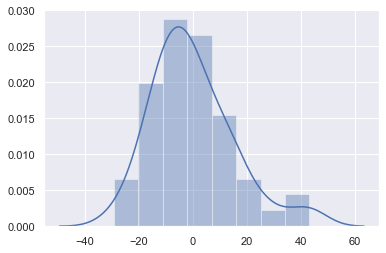

In [49]:
sns.distplot(model3.resid)

In [50]:
from scipy.stats import shapiro

In [51]:
#null--> normal Dist.
# alternate--> not normal dist
shapiro(model3.resid)
#0.9--> test statistical value, 0.02 is probability value

(0.9450905919075012, 0.02152460627257824)

- p<5%- Reject Null--> not normal dist
- p>5%- accept null:--> normal dist.

## Normality Test using Kolmogorov Smirnov Test

In [53]:
sm.stats.diagnostic.kstest_normal(model3.resid)

(0.12956840882658283, 0.03528591285877599)

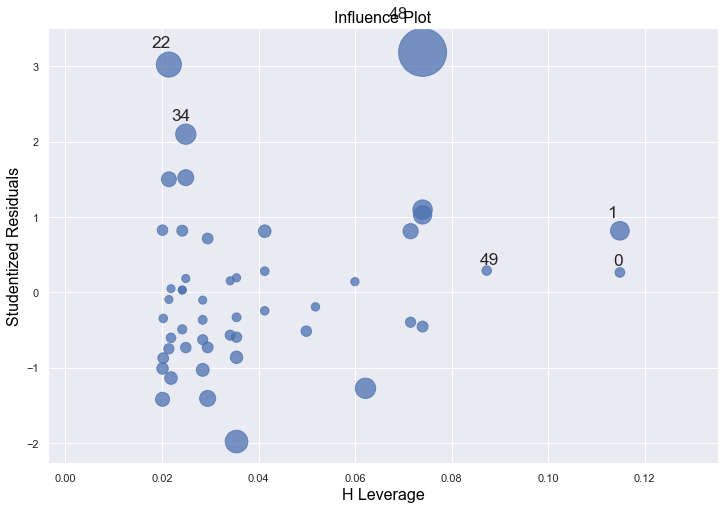

In [55]:
fig,ax=plt.subplots(figsize=(12,8))
fig=sm.graphics.influence_plot(model3,ax=ax)

In [56]:
# the best and accurate way to remove outliers is cook distance. It is better than Z-test.

In [57]:
#cook Dist.

influ = model3.get_influence()

In [59]:
cook=influ.summary_frame()

In [60]:
cook.head()

,dfb_Intercept,dfb_speed,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.094402,-0.086246,0.004592,0.266042,0.114861,0.095836,0.263450,0.094903
1,0.292425,-0.267160,0.043514,0.818933,0.114861,0.295005,0.816078,0.293977
2,-0.107498,0.093693,0.006202,-0.401346,0.071504,-0.111376,-0.397812,-0.110396
3,0.218976,-0.190855,0.025467,0.813266,0.071504,0.225687,0.810353,0.224879
4,0.034075,-0.029014,0.000645,0.142162,0.059971,0.035907,0.140703,0.035539


In [61]:
# Here we have to observe cooks_d----> Usually general standard threshold ranges in 0.1---> if it is more than 0.1 then it is outlier

In [62]:
cook[cook['cooks_d']>0.07]

,dfb_Intercept,dfb_speed,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
22,0.248506,-0.115581,0.085552,2.795166,0.021431,0.413647,3.022829,0.447338
48,-0.577473,0.769020,0.340396,2.919060,0.073985,0.825101,3.184993,0.900270


In [63]:
cars_new= cars.drop(labels=[22,48])

In [64]:
cars_new.head()

,speed,dist,X-X_bar,Y-Y_bar,(X-X_bar)(Y-Y_bar),(Y-Y_bar)^2,Slope Numerator,(X-X_bar)^2,Slope Denominator,Slope,Intercept,Y-Predict
0,4,2,-11.4,-40.98,467.172,1679.3604,5387.4,129.96,1370.0,3.932409,-17.579095,-1.849460
1,4,10,-11.4,-32.98,375.972,1087.6804,5387.4,129.96,1370.0,3.932409,-17.579095,-1.849460
2,7,4,-8.4,-38.98,327.432,1519.4404,5387.4,70.56,1370.0,3.932409,-17.579095,9.947766
3,7,22,-8.4,-20.98,176.232,440.1604,5387.4,70.56,1370.0,3.932409,-17.579095,9.947766
4,8,16,-7.4,-26.98,199.652,727.9204,5387.4,54.76,1370.0,3.932409,-17.579095,13.880175


In [65]:
model4= sm.OLS.from_formula(formula='dist~speed',data=cars_new).fit()

In [67]:
model4.summary()

#we have to observe AIC(AIC--> area, how much data has been lost), compared to model3 summary AIC has been reduced

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     108.3
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           1.13e-13
Time:                        11:44:41   Log-Likelihood:                -189.16
No. Observations:                  48   AIC:                             382.3
Df Residuals:                      46   BIC:                             386.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.5336      5.699     -2.726      0.009     -27.005      -4.062
speed          3.6812      0.354     10.405      0.000       2.969       4.393
==============================================================================
Omnibus:                        2.282   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.320   Jarque-Bera (JB):                1.837
Skew:                           0.479   Prob(JB):                        0.399
Kurtosis:                       2.968   Cond. No.                         50.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""